In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')

In [71]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,year,month,day,day_of_week,total
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
13,Tasmania,Australia,-42.8821,147.3272,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
14,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
15,Western Australia,Australia,-31.9505,115.8605,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
35,Alberta,Canada,53.9333,-116.5765,2020-01-22,0,0,0,0,Americas,2020,1,22,Wednesday,0
36,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0,0,0,0,Americas,2020,1,22,Wednesday,0


In [ ]:
df.isnull().sum()# التحقق من القيم الفارغة

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df = df.dropna()  # حذف الصفوف التي تحتوي على قيم فارغة
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


In [31]:
def remove_outliers_iqr(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # تعريف الحدود للقيم الشاذة
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # تصفية القيم الشاذة
    return dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]
    for column in df.columns:
      if df[column].dtype in [float, int]:  # تطبيق فقط على الأعمدة الرقمية
        df_cleaned = remove_outliers_iqr(df_cleaned, column)




In [34]:
from datetime import datetime

# Assuming 'df' is your original DataFrame with the 'Date' column
df_cleaned = df.copy()  # Create a copy to avoid modifying the original

# ... (your previous code for cleaning 'df_cleaned')

# Convert 'Date' column to datetime objects
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract year, month, day, and day of week
df_cleaned['year'] = df_cleaned['Date'].dt.year
df_cleaned['month'] = df_cleaned['Date'].dt.month
df_cleaned['day'] = df_cleaned['Date'].dt.day
df_cleaned['day_of_week'] = df_cleaned['Date'].dt.dayofweek

# Calculate 'total' column
df_cleaned['total'] = df_cleaned['Deaths'] + df_cleaned['Recovered'] + df_cleaned['Active']

df_cleaned.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,year,month,day,day_of_week,total
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,2,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,2,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,2,0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,2,0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,2,0


In [ ]:
df_cleaned['day_of_week']=df_cleaned['day_of_week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday',})
df_cleaned.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,year,month,day,day_of_week,total
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific,2020,1,22,Wednesday,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14664 entries, 8 to 49060
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  14664 non-null  object        
 2   Lat             14664 non-null  float64       
 3   Long            14664 non-null  float64       
 4   Date            14664 non-null  datetime64[ns]
 5   Confirmed       14664 non-null  int64         
 6   Deaths          14664 non-null  int64         
 7   Recovered       14664 non-null  int64         
 8   Active          14664 non-null  int64         
 9   WHO Region      14664 non-null  object        
 10  year            14664 non-null  int32         
 11  month           14664 non-null  int32         
 12  day             14664 non-null  int32         
 13  day_of_week     14664 non-null  object        
 14  total           14664 non-null  int64         
dtypes: date

In [ ]:
df_cleaned.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,year,month,day,total
count,14664.000000,14664.000000,14664,14664.000000,14664.000000,14664.000000,14664.000000,14664.0,14664.000000,14664.000000,14664.000000
mean,24.399387,38.808982,2020-04-24 12:00:00.000000256,1717.704446,95.505046,865.607679,756.591721,2020.0,4.281915,15.957447,1717.704446
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000,0.000000,0.000000,-14.000000,2020.0,1.000000,1.000000,0.000000
25%,17.900000,-63.050100,2020-03-08 18:00:00,10.000000,0.000000,0.000000,0.000000,2020.0,3.000000,8.000000,10.000000
50%,30.796350,102.098650,2020-04-24 12:00:00,142.000000,1.000000,27.000000,4.000000,2020.0,4.000000,16.000000,142.000000
75%,43.666100,116.414200,2020-06-10 06:00:00,554.000000,6.000000,234.000000,59.000000,2020.0,6.000000,24.000000,554.000000
max,71.706900,165.618042,2020-07-27 00:00:00,68135.000000,5667.000000,64435.000000,53061.000000,2020.0,7.000000,31.000000,68135.000000
std,27.888920,94.424973,NaN,8523.573314,589.281516,6195.703246,4719.014122,0.0,1.810285,8.770309,8523.573314


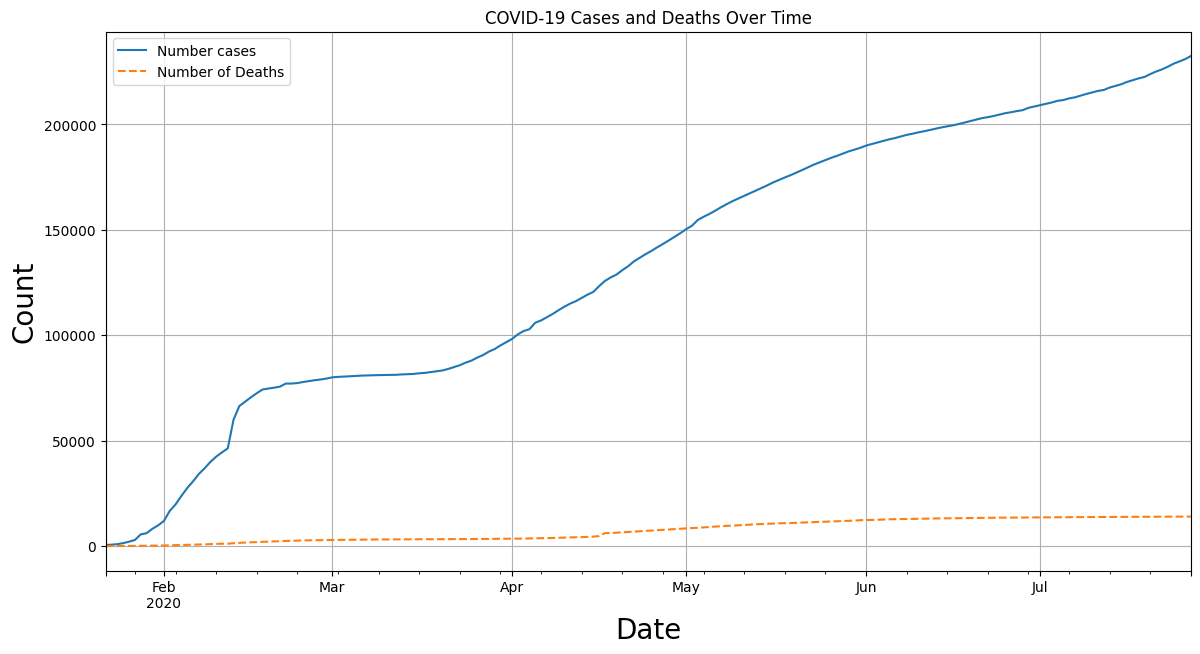

In [ ]:
# مجموع الحالات والوفيات حسب القارة
plt.figure(figsize=(14, 7))
# Verify the actual column name for cases (e.g., 'Confirmed', 'Total Cases', etc.)
# and replace 'cases' below with the correct name
df_cleaned.groupby('Date')['Confirmed'].sum().plot(label='Number cases') # Changed 'date' to 'Date'
df_cleaned.groupby('Date')['Deaths'].sum().plot(label='Number of Deaths', linestyle='--') # Changed 'deaths' to 'Deaths'
plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date',size=20)
plt.ylabel("Count", size=20)
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Date'>

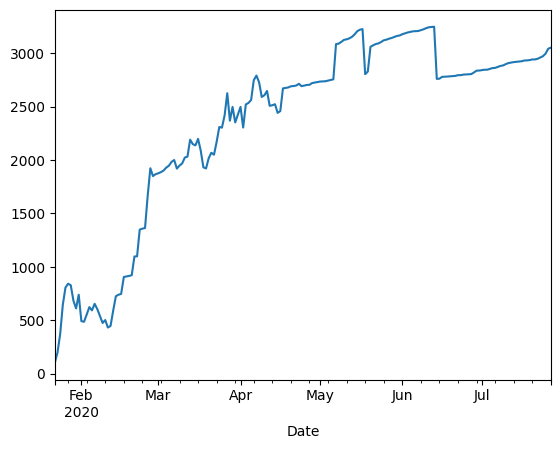

In [60]:

df_cleaned.groupby('Date')['Confirmed'].sum().plot(label='Number cases') # Changed 'date' to 'Date'

In [40]:
df_cleaned['Active'] = df_cleaned['Active'].abs()  # Convert negative values to positiv
df_cleaned= remove_outliers_iqr(df_cleaned,'Active')
df_cleaned= remove_outliers_iqr(df_cleaned,'Confirmed')
df_cleaned= remove_outliers_iqr(df_cleaned,'Deaths')
fig = px.scatter(df_cleaned, x="Confirmed", y="Deaths",
                 size="Active", color="WHO Region", hover_name="Country/Region",
                 log_x=True, size_max=60)
fig.show()

<ipython-input-40-79968def76b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



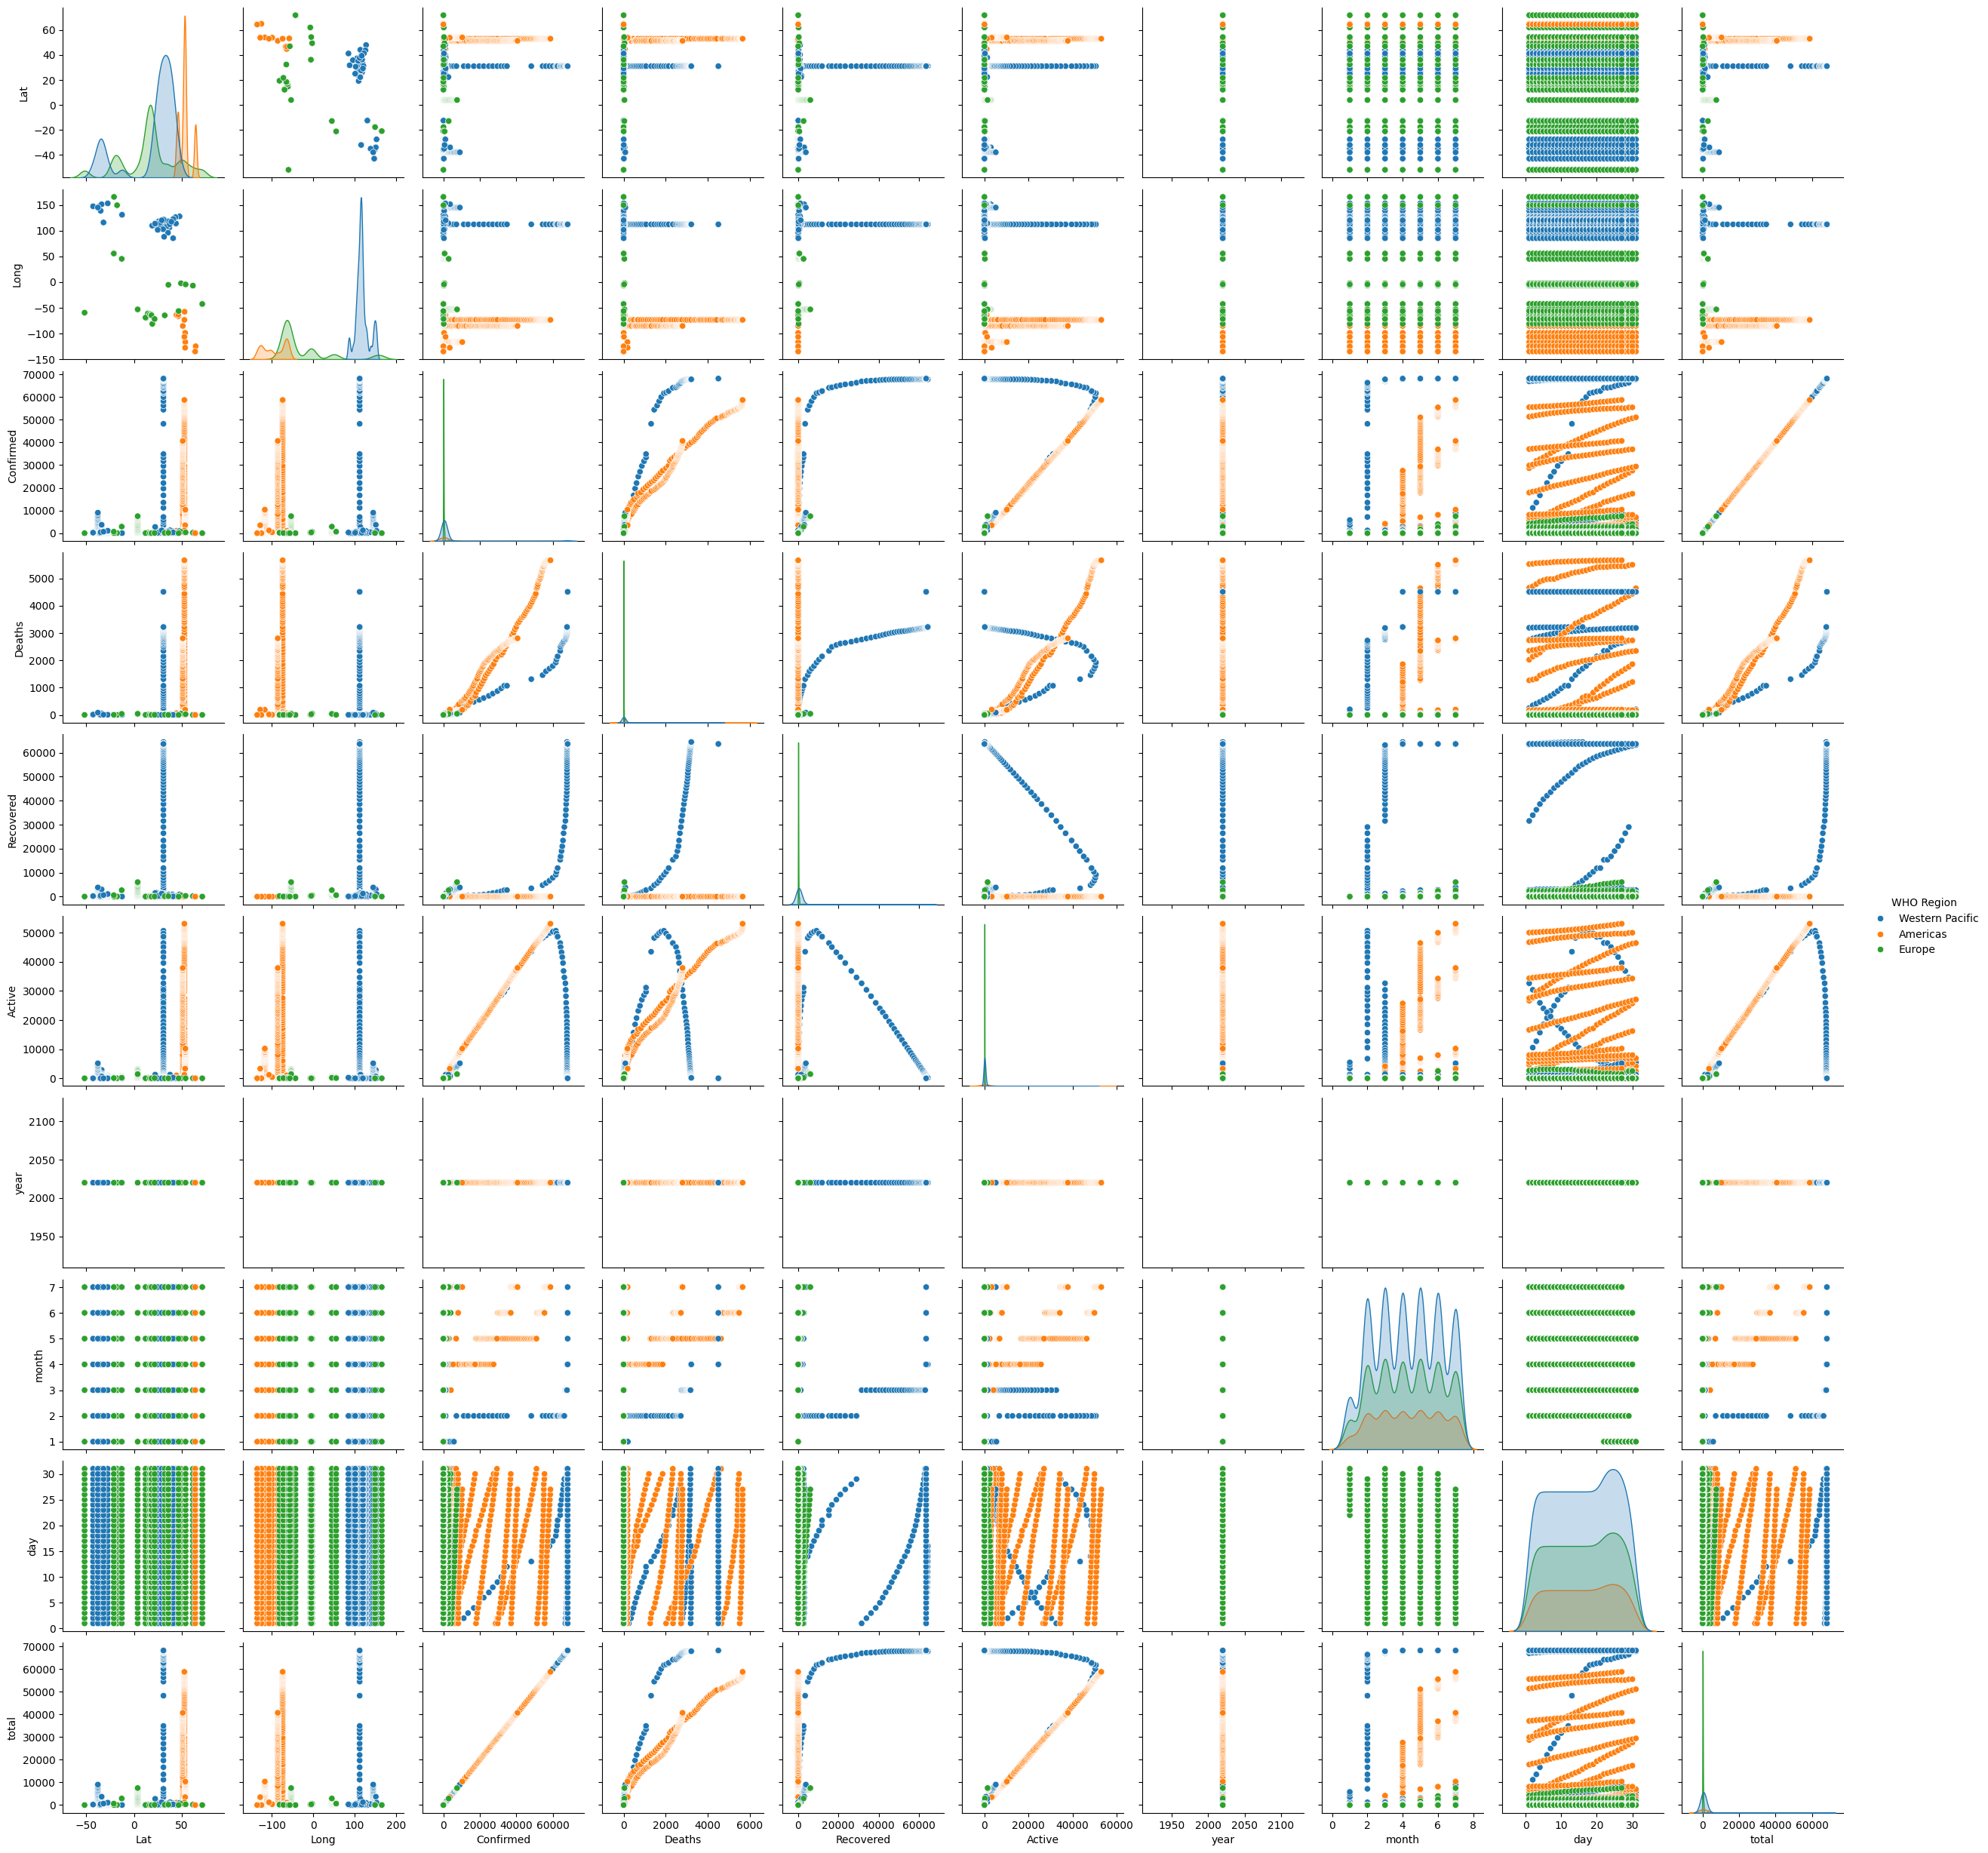

In [18]:
df_cleaned=sns.pairplot(df_cleaned,hue='WHO Region')

In [38]:
# Create a box plot for the cleaned data
df_cleaned = remove_outliers_iqr(df, 'Confirmed')

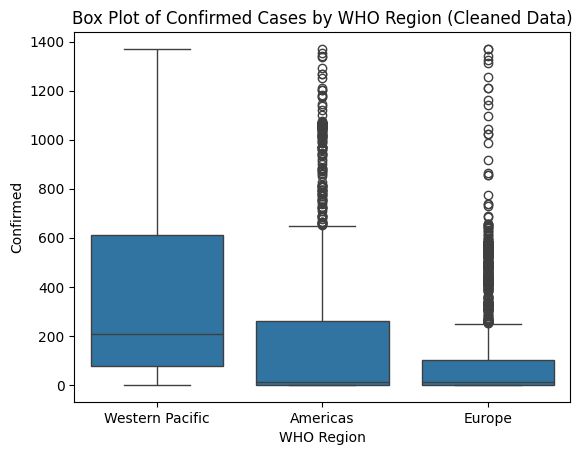

In [39]:
# Create a box plot with the cleaned data
sns.boxplot(x='WHO Region', y='Confirmed', data=df_cleaned)
plt.title('Box Plot of Confirmed Cases by WHO Region (Cleaned Data)')
plt.show()


<Axes: >

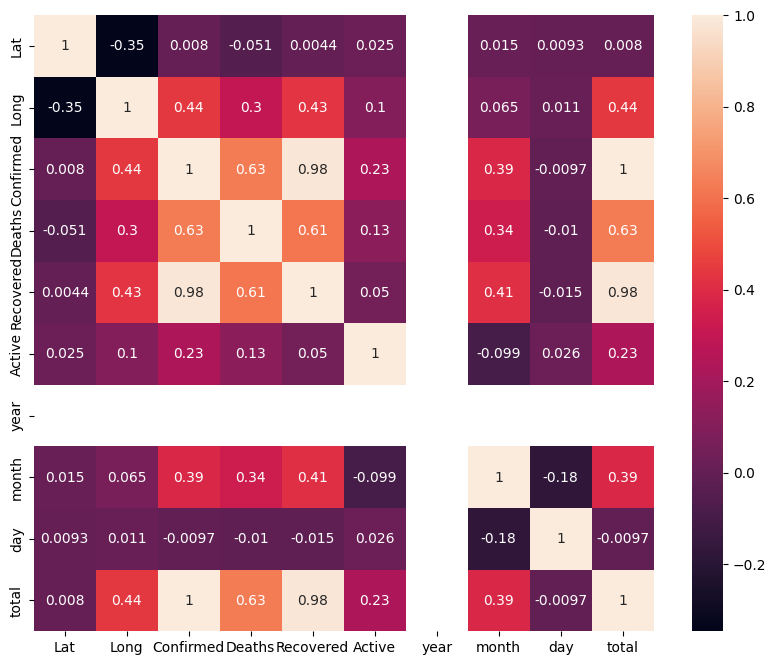

In [51]:
plt.figure(figsize=(10,8))
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Calculate correlations on the purely numeric DataFrame
sns.heatmap(df_numeric.corr(), annot=True)

Text(0.5, 1.0, 'Distribution of WHO Regions')

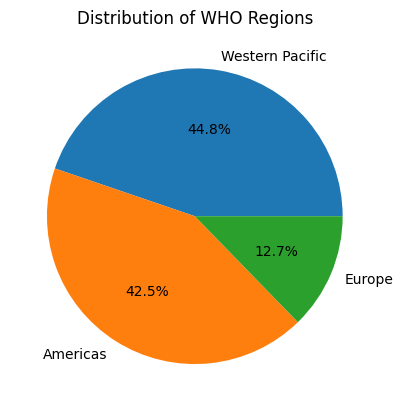

In [55]:
plt.pie(df_cleaned['WHO Region'].value_counts(), labels=df_cleaned['WHO Region'].unique(), autopct='%1.1f%%')
plt.title('Distribution of WHO Regions')

<Axes: xlabel='Confirmed', ylabel='Count'>

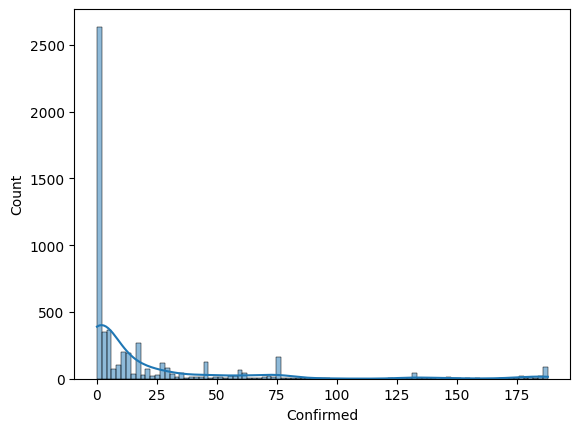

In [70]:
sns.histplot(df_cleaned['Confirmed'], kde=True)